This code requires Python 3.8

In [50]:
#Read the reduced database
!pip install openpyxl
!pip install --upgrade openpyxl

In [51]:
import pickle
import pandas as pd
import numpy as np
data = pickle.load(open('full_data_corrected_2024.pkl', 'rb'))
data=pd.DataFrame(data)
data2 = pd.read_excel('Extras_Data_Full_2.xlsx')
data_no_v3 = data2.copy()
# Eliminar las filas donde 'PVC_transition' sea igual a 'V3'
data_no_v3 = data_no_v3[data_no_v3['PVC_transition'] != 'V3']
data_no_v3 = data_no_v3.dropna(subset=['PVC_transition'])
print(data_no_v3.PVC_transition.value_counts())
      

# calculem el clinical score pels pacients que no tinguin v3

#leads
data_no_v3['clinical_score_calculated'] = None
for i in range(len(data_no_v3)):
    if data_no_v3['PVC_transition'].iloc[i] == 'V2':
        data_no_v3['clinical_score_calculated'].iloc[i] = 2
    elif data_no_v3['PVC_transition'].iloc[i] == 'V1':
        data_no_v3['clinical_score_calculated'].iloc[i] = 3
    elif data_no_v3['PVC_transition'].iloc[i] == 'V4':
        data_no_v3['clinical_score_calculated'].iloc[i] = -2
    elif data_no_v3['PVC_transition'].iloc[i] == 'V5':
        data_no_v3['clinical_score_calculated'].iloc[i] = -3
    elif data_no_v3['PVC_transition'].iloc[i] == 'V6':
        data_no_v3['clinical_score_calculated'].iloc[i] = -4
    if data_no_v3['Sex'].iloc[i] == 'Male':
        data_no_v3['clinical_score_calculated'].iloc[i] += 1
    if data_no_v3['Age'].iloc[i] > 50:
        data_no_v3['clinical_score_calculated'].iloc[i] += 1
    if data_no_v3['HTA'].iloc[i] == 'Yes':
        data_no_v3['clinical_score_calculated'].iloc[i] += 1

display(data_no_v3.head())
data_no_v3['Origin_calculated'] = None
for i in range(len(data_no_v3)):
    if data_no_v3['clinical_score_calculated'].iloc[i] >= 2:
        data_no_v3['Origin_calculated'].iloc[i] = 'LVOT Origin'
    else: 
        data_no_v3['Origin_calculated'].iloc[i] = 'RVOT Origin'
display(data_no_v3.head())

print(data_no_v3.Origin_calculated.value_counts())


PVC_transition
V4    73
V1    46
V2    40
V5    22
V6    12
Name: count, dtype: int64


/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/2984798094.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_v3['clinical_score_calculated'].iloc[i] = -3
/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/2984798094.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_v3['clinical_score_calculated'].iloc[i] += 1
/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/2984798094.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Unnamed: 0,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin,clinical_score_calculated
4,5,Male,Yes,72.0,V5,Tricuspid annulus,178.0,94.0,29.667971,No,No,No,Yes,Yes,3.0,Anillo tricuspídeo lateral,0.0,0
6,7,Male,Yes,66.0,V5,Right ventricle,NaN,80.0,NaN,Yes,Yes,No,No,No,3.0,VI laterobasal,0.0,0
8,9,Female,Yes,55.0,V4,RVOT,173.0,69.0,23.054562,No,No,No,No,No,2.0,RVOT anteroseptal,1.0,0
9,10,Female,No,25.0,V5,RVOT,155.0,51.0,21.227888,Yes,No,No,No,No,0.0,RVOT anterior,1.0,-3
10,11,Female,No,52.0,V4,RVOT,170.0,73.0,25.259516,No,No,No,No,No,1.0,RVOT posteroseptal,1.0,-1


/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/2984798094.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_v3['Origin_calculated'].iloc[i] = 'RVOT Origin'
/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/2984798094.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_v3['Origin_calculated'].iloc[i] = 'RVOT Origin'
/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/2984798094.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Unnamed: 0,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin,clinical_score_calculated,Origin_calculated
4,5,Male,Yes,72.0,V5,Tricuspid annulus,178.0,94.0,29.667971,No,No,No,Yes,Yes,3.0,Anillo tricuspídeo lateral,0.0,0,RVOT Origin
6,7,Male,Yes,66.0,V5,Right ventricle,NaN,80.0,NaN,Yes,Yes,No,No,No,3.0,VI laterobasal,0.0,0,RVOT Origin
8,9,Female,Yes,55.0,V4,RVOT,173.0,69.0,23.054562,No,No,No,No,No,2.0,RVOT anteroseptal,1.0,0,RVOT Origin
9,10,Female,No,25.0,V5,RVOT,155.0,51.0,21.227888,Yes,No,No,No,No,0.0,RVOT anterior,1.0,-3,RVOT Origin
10,11,Female,No,52.0,V4,RVOT,170.0,73.0,25.259516,No,No,No,No,No,1.0,RVOT posteroseptal,1.0,-1,RVOT Origin


Origin_calculated
RVOT Origin    107
LVOT Origin     86
Name: count, dtype: int64


In [52]:

#ara fem amb els v3
data_v3=data.copy()
data_v3 = data_v3[data_v3['PVC_transition'] == 'V3']
display(data_v3.head())

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,...,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin
1,"[-0.018000000000000002, -0.018000000000000002,...","[-0.042, -0.042, -0.042, -0.042, -0.042, -0.04...","[-0.021, -0.021, -0.021, -0.024, -0.024, -0.02...","[0.0, 0.0, 0.0, 0.003, 0.003, 0.003, 0.003, 0....","[0.03, 0.03, 0.03, 0.027, 0.027, 0.027, 0.03, ...","[-0.03, -0.03, -0.03, -0.03, -0.033, -0.033, -...","[0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.0...","[-0.036000000000000004, -0.039, -0.039, -0.042...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.003, -0...","[-0.018000000000000002, -0.018000000000000002,...",...,68.0,NaN,No,No,No,No,No,1.0,Pared libre anterior,1.0
2,"[0.015, 0.012, 0.009000000000000001, 0.0090000...","[0.0, 0.006, 0.006, 0.003, 0.0, 0.0, -0.003, -...","[-0.009000000000000001, -0.006, -0.003, -0.003...","[0.012, 0.009000000000000001, 0.006, 0.006, 0....","[-0.009000000000000001, -0.009000000000000001,...","[-0.003, 0.0, 0.0, 0.0, -0.003, -0.006, -0.006...","[-0.093, -0.096, -0.096, -0.099, -0.096, -0.09...","[-0.123, -0.126, -0.129, -0.129, -0.129, -0.12...","[-0.153, -0.156, -0.159, -0.162, -0.159, -0.15...","[-0.099, -0.10200000000000001, -0.105, -0.105,...",...,70.0,NaN,No,Yes,No,No,No,1.0,RCC,1.0
4,"[-0.009000000000000001, -0.006, 0.0, 0.0, 0.00...","[0.903, 0.894, 0.888, 0.879, 0.867, 0.852, 0.8...","[0.912, 0.9, 0.888, 0.876, 0.864, 0.846, 0.825...","[-0.462, -0.453, -0.444, -0.438, -0.426, -0.41...","[-0.444, -0.444, -0.441, -0.438, -0.435, -0.42...","[0.906, 0.897, 0.888, 0.879, 0.864, 0.849, 0.8...","[-0.183, -0.192, -0.20700000000000002, -0.234,...","[0.066, 0.084, 0.10200000000000001, 0.117, 0.1...","[0.27, 0.261, 0.258, 0.252, 0.24, 0.225, 0.207...","[0.417, 0.426, 0.435, 0.438, 0.438, 0.429, 0.4...",...,79.0,30.859375,No,No,No,No,No,1.0,RVOT septal,1.0
5,"[-0.042, -0.042, -0.039, -0.039, -0.039, -0.04...","[0.18, 0.18, 0.18, 0.18, 0.18, 0.183, 0.186, 0...","[0.222, 0.219, 0.222, 0.222, 0.222, 0.228, 0.2...","[-0.132, -0.132, -0.132, -0.132, -0.132, -0.13...","[-0.066, -0.066, -0.069, -0.069, -0.069, -0.06...","[0.201, 0.201, 0.201, 0.201, 0.201, 0.20400000...","[-0.252, -0.246, -0.243, -0.243, -0.243, -0.24...","[-0.429, -0.45, -0.441, -0.42, -0.396, -0.384,...","[0.138, 0.153, 0.165, 0.183, 0.204000000000000...","[0.255, 0.258, 0.246, 0.225, 0.207000000000000...",...,97.0,30.273712,No,No,No,Yes,No,2.0,Seno de Valsalva izdo.,1.0
8,"[-0.339, -0.333, -0.321, -0.318, -0.321, -0.32...","[-0.378, -0.375, -0.375, -0.372, -0.366, -0.36...","[-0.036000000000000004, -0.042, -0.048, -0.051...","[-0.15, -0.14400000000000002, -0.135, -0.132, ...","[0.36, 0.354, 0.34800000000000003, 0.345000000...","[-0.20700000000000002, -0.20700000000000002, -...","[0.312, 0.309, 0.309, 0.309, 0.309, 0.309, 0.3...","[-0.12, -0.123, -0.126, -0.126, -0.123, -0.12,...","[-0.555, -0.558, -0.561, -0.558, -0.555, -0.55...","[-0.639, -0.639, -0.642, -0.642, -0.639, -0.63...",...,62.0,26.835180,No,No,No,No,No,2.0,RVOT posterolateral,1.0


In [53]:
#Read the table with the labels for the specific SOO
import pandas as pd
Specific_SOO = data['SOO'].copy()
template     = pd.read_excel('labels_FontiersUnsupervised.xlsx', sheet_name='Hoja2')

In [54]:
#Create a list with the specific SOO depending on the original label
Simplified_SOO = []
for SOO in Specific_SOO:
    idxs = template.index[template['SOO'] == SOO].tolist()
    if len(idxs) != 0:
        Simplified_SOO.append(template.iloc[idxs[0]]['Simplified'])
    else:
        Simplified_SOO.append('-') #Not recognized or nor annotated

In [55]:
#Cases per origin (There are few cases from origins in the AoC, such as LCC or RCC)
counter = {i:Simplified_SOO.count(i) for i in Simplified_SOO}
print(counter)


{'LVOTSUBVALVULAR': 22, 'RVOTFREEWALL': 44, 'RCC': 9, 'RVOTSEPTUM': 59, 'LCC': 9, 'COMMISURE': 15, 'LVOTSUMMIT': 22, '-': 1}


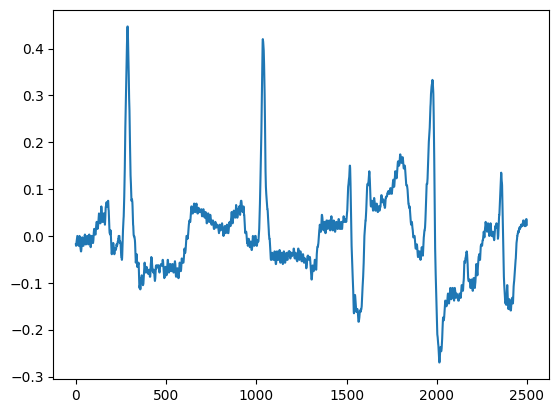

In [56]:
#Example on how to plot a single signal from the database
import matplotlib.pyplot as plt
plt.plot(data['I'][0]);

:SAK needs to be installed from a repository by running pip install git+https://github.com/guillermo-jimenez/sak.git


In [57]:
#Example with ECG segmentation
!pip install git+https://github.com/guillermo-jimenez/sak.git
!pip install timm
import torch
import sak
from functools import partial
import math
import scipy as sp
import skimage
import skimage.util
from typing import List,Tuple
import numpy as np
models_ECG = [
    torch.load(f"modelos/model.{i+1}") for i in range(5)
]

  Cloning https://github.com/guillermo-jimenez/sak.git to /private/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/pip-req-build-bv0qy8mc
  Running command git clone --filter=blob:none --quiet https://github.com/guillermo-jimenez/sak.git /private/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/pip-req-build-bv0qy8mc
  Resolved https://github.com/guillermo-jimenez/sak.git to commit 90abd224fec256a81bf8304e44572af3bfdc4202
  Preparing metadata (setup.py) ... done


/var/folders/r3/vqqfj3k91h5br26fd3f7sb_w0000gn/T/ipykernel_6593/431179032.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"modelos/model.{i+1}") for i in ra

In [58]:
def predict_ecg(ecg: np.ndarray, fs: float, model: List[torch.nn.Module],
                window_size: int = 2048, stride: int = 256, threshold_ensemble: float = 0.5,
                thr_dice=0.9, percentile=95, ptg_voting = 0.5, batch_size = 16,
                normalize=True, norm_threshold: float = 1e-6, filter = True) -> np.ndarray:
    """This function is used to delineate an ECG recording of arbitrary size ('ecg' variable, SAMPLES x LEADS)
    and to obtain the fiducials for the P, QRS and T segments as a binary mask of shape 3 x SAMPLES.

    Inputs:
    ecg                <- some array, e.g. shape 198484 x 12
    fs                 <- sampling frequency, e.g. 1000Hz. Will downsample to 250Hz for the AI model to work
    model              <- list of segmentation models for the ensemble
    window_size        <- the "chunk" size that will be processed at a time of the input ecg (e.g., in the example,
                          2048 samples out of the 198484 samples of the ECG)
    stride             <- the "stride" parameter allows for some overlap between the windows of the window_size
    threshold_ensemble <- Percentage of voting for the AI ensemble [0-1]
    thr_dice           <- Threshold for considering each sample as positive according to the Dice score
    percentile         <- Percentile for the amplitude normalization
    ptg_voting         <- Threshold for considering each sample as positive according to the Dice score
    batch_size         <- Number of windows that fit in the batch
    normalize          <- Boolean to indicate whether the ECG has to be normalized. In general, set this to True
                          always, as the ECGs must have the amplitude of a normal sinus rhythm around amplitude of
                          "1" to work, as that was the preprocessing for model training. Only change if a
                          comparable pre-processing is performed
    norm_threshold     <- Threshold for the normalization, to avoid passing baseline wander or noise as signal
    filter             <- Filter the signal with a band-pass filter in [0.5-125] Hz
    """
    # Preprocess signal
    ecg = np.copy(ecg).squeeze()
    if ecg.ndim == 0:
        return np.array([])
    elif ecg.ndim == 1:
        ecg = ecg[:,None]
    elif ecg.ndim == 2:
        if ecg.shape[0] < ecg.shape[1]:
            ecg = ecg.T
    else:
        raise ValueError("2 dims max allowed")
    ecg_250 = sak.signal.interpolate.interp1d(ecg,round(ecg.shape[0]*250/fs),axis=0)


    # Pad if necessary
    if ecg_250.shape[0] < window_size:
        padding = math.ceil(ecg_250.shape[0]/window_size)*window_size-ecg_250.shape[0]
        ecg_250 = np.pad(ecg_250,((0,padding),(0,0)),mode='edge')
    if (ecg_250.shape[0]-window_size)%stride != 0:
        padding = math.ceil((ecg_250.shape[0]-window_size)/stride)*stride-(ecg_250.shape[0]%window_size)
        ecg_250 = np.pad(ecg_250,((0,padding),(0,0)),mode='edge')

    # Get dimensions
    N,L = ecg_250.shape

    # (Optional) Normalize amplitudes
    if normalize:
        # Get ecg_250 when it's not flat zero
        norm_signal = ecg_250[np.all(np.abs(np.diff(ecg_250,axis=0,append=0)) >= norm_threshold,axis=1),:]

        # High pass filter normalized ecg_250 to avoid issues with baseline wander
        norm_signal = sp.signal.filtfilt(*sp.signal.butter(2, 0.5/250., 'high'),norm_signal, axis=0)

        # Compute amplitude for those segments
        amplitude = np.array(sak.signal.moving_lambda(
            norm_signal,
            256,
            partial(sak.signal.amplitude,axis=0),
            axis=0
        ))
        amplitude = amplitude[np.all(amplitude > norm_threshold,axis=1),]
        amplitude = np.percentile(amplitude, percentile, axis=0)

        # Apply normalization
        ecg_250 = ecg_250/amplitude[None,:]

    # (Optional) Filter ecg_250
    if filter:
        ecg_250 = sp.signal.filtfilt(*sp.signal.butter(2,   0.5/250., 'high'),ecg_250,axis=0)
        ecg_250 = sp.signal.filtfilt(*sp.signal.butter(2, 125.0/250.,  'low'),ecg_250,axis=0)
        ecg_250 = sp.signal.lfilter(*sp.signal.iirnotch(50,20.0,250.),ecg_250,axis=0)
        ecg_250 = sp.signal.lfilter(*sp.signal.iirnotch(60,20.0,250.),ecg_250,axis=0)

    # Avoid issues with negative strides due to filtering:
    if np.any(np.array(ecg_250.strides) < 0):
        ecg_250 = ecg_250.copy()

    # Data structure for computing the segmentation
    windowed_signal = skimage.util.view_as_windows(ecg_250,(window_size,1),(stride,1))

    # Flat batch shape
    new_shape = (windowed_signal.shape[0]*windowed_signal.shape[1],*windowed_signal.shape[2:])
    windowed_signal = np.reshape(windowed_signal,new_shape)

    # Exchange channel position
    windowed_signal = np.swapaxes(windowed_signal,1,2)

    # Output structures
    windowed_mask = np.zeros((windowed_signal.shape[0],3,windowed_signal.shape[-1]),dtype=int)

    # Check device for segmentation
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Compute segmentation for all leads independently
    with torch.no_grad():
        if isinstance(model,list):
            for m in model:
                m = m.to(device)
                for i in range(0,windowed_signal.shape[0],batch_size):
                    inputs = {"x": torch.tensor(windowed_signal[i:i+batch_size]).float().to(device)}
                    outputs = m(inputs)["sigmoid"].cpu().detach().numpy()
                    windowed_mask[i:i+batch_size] += outputs > thr_dice
            windowed_mask = windowed_mask >= len(model)*threshold_ensemble
        else:
            model = model.to(device)
            for i in range(0,windowed_signal.shape[0],batch_size):
                inputs = {"x": torch.tensor(windowed_signal[i:i+batch_size]).to(device).float()}
                outputs = model(inputs)["sigmoid"].cpu().detach().numpy()
                windowed_mask[i:i+batch_size] = outputs > thr_dice

    # Retrieve mask as 1D
    counter = np.zeros((N), dtype=int)
    segmentation_250 = np.zeros((3,N))

    # Iterate over windows
    for i in range(0,windowed_mask.shape[0],L):
        counter[(i//L)*stride:(i//L)*stride+window_size] += 1
        segmentation_250[:,(i//L)*stride:(i//L)*stride+window_size] += windowed_mask[i:i+L].sum(0)
    segmentation_250 = ((segmentation_250/counter) >= (ecg_250.shape[-1]*ptg_voting))

    # Correct padding
    segmentation_250 = segmentation_250[:,:-padding]

    # Interpolate back to original sampling frequency
    segmentation     = sak.signal.interpolate.interp1d(segmentation_250,ecg.shape[0],axis=-1,kind="nearest")

    return segmentation


In [59]:
from sak.signal import StandardHeader
ecg_signals = []
for lead in StandardHeader:
    ecg_signals.append(data[lead][0])
ecg_signals = np.asarray(ecg_signals).T

In [60]:
#Transform the signal from dictionary to numpy array
from sak.signal import StandardHeader
ecg_signals_v3 = []
for i in range(10):
    for lead in StandardHeader:
        if lead == 'V3':
            ecg_signals_v3.append(data[lead][i])
        else:
            continue
ecg_signals_v3 = np.asarray(ecg_signals_v3)
display(ecg_signals_v3.shape)


(10, 2500)

In [61]:
#Apply the segmentation for a single record (make function to apply to multiple signals)
fs = 1000
fs_high,fs_low = 0.5,100.0
ecg_250 = sak.signal.interpolate.interp1d(ecg_signals,round(ecg_signals.shape[0]*250/fs), axis=0).T
ecg_250 = sp.signal.filtfilt(*sp.signal.butter(2, fs_high/250., 'high'), ecg_250, axis=-1)
ecg_250 = sp.signal.filtfilt(*sp.signal.butter(2,  fs_low/250.,  'low'), ecg_250, axis=-1)

segmentation_250 = predict_ecg(ecg_250,250.,models_ECG,normalize=True,filter=False)

segmentation = sak.signal.interpolate.interp1d(segmentation_250,ecg_signals.shape[0],axis=-1,kind="nearest")

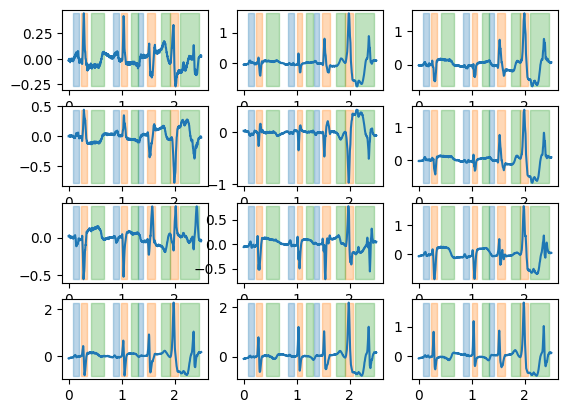

In [62]:
#Plot all the signals
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,3)
row = 0
col = 0
x = np.linspace(0,2.5,int(fs*2.5))
for i,sig in enumerate(ecg_signals.T):
    ax[row,col].plot(x, sig)
    ax[row,col].fill_between(x, np.min(sig), np.max(sig), where=(segmentation[0,:] == 1), color='C0', alpha = 0.3 )
    ax[row,col].fill_between(x, np.min(sig), np.max(sig), where=(segmentation[1,:] == 1), color='C1', alpha = 0.3 )
    ax[row,col].fill_between(x, np.min(sig), np.max(sig), where=(segmentation[2,:] == 1), color='C2', alpha = 0.3 )
    col += 1
    if col >= 3:
        row += 1
        col = 0

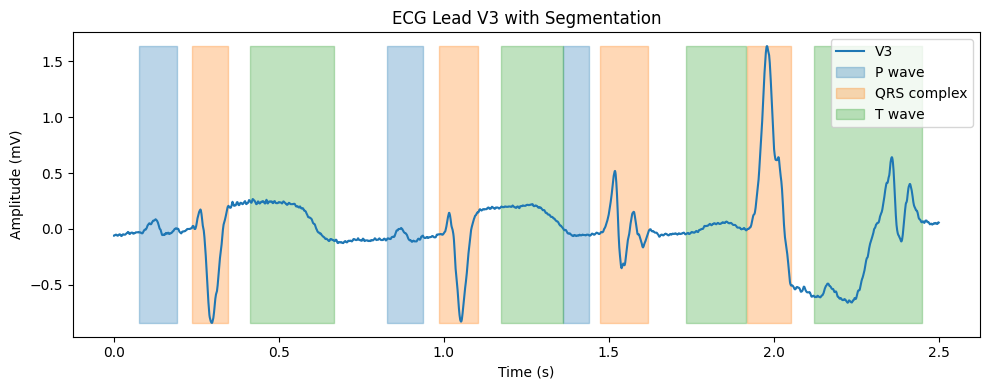

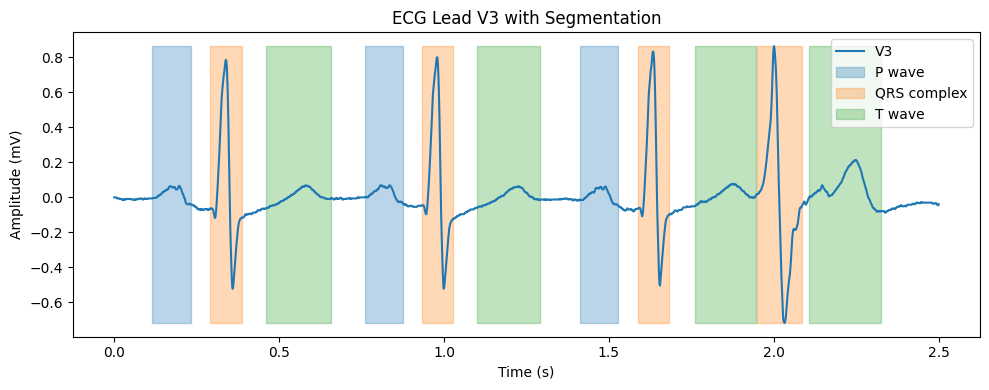

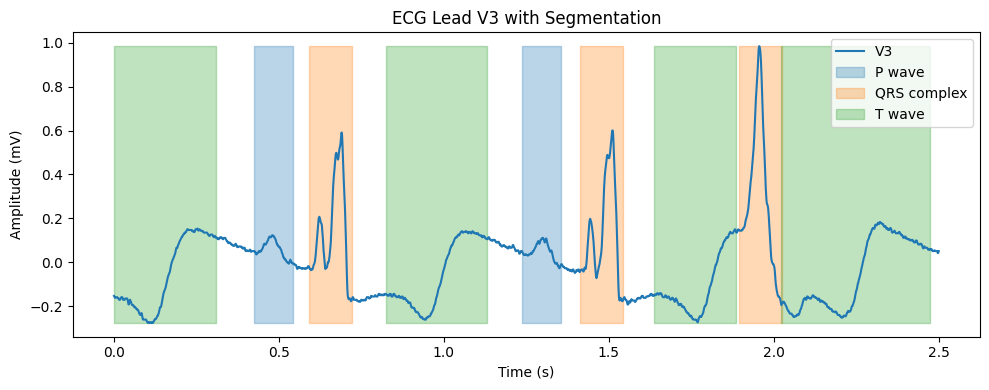

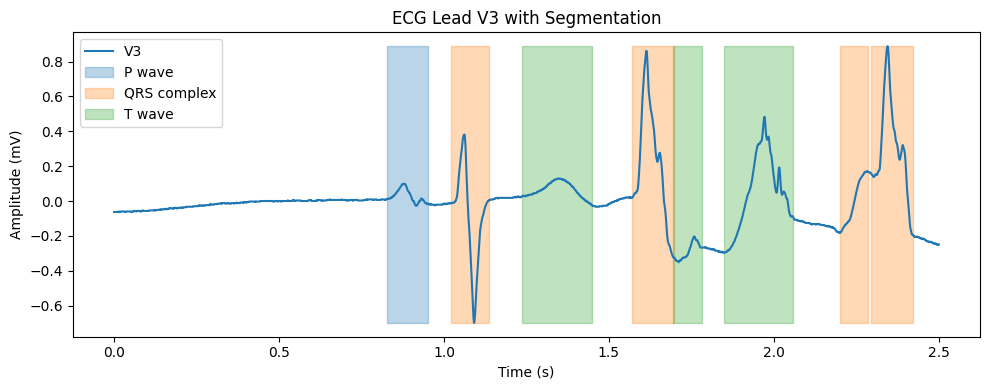

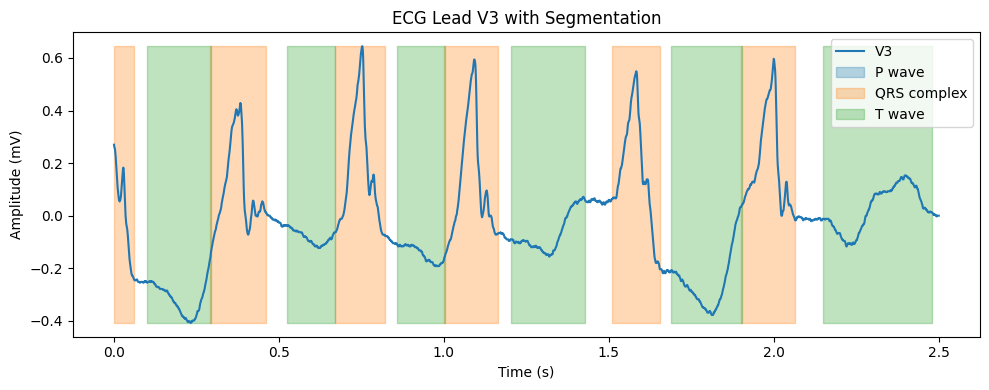

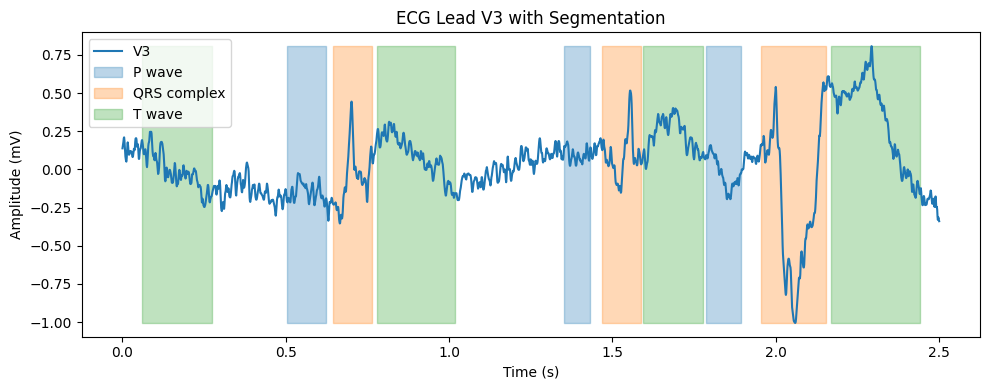

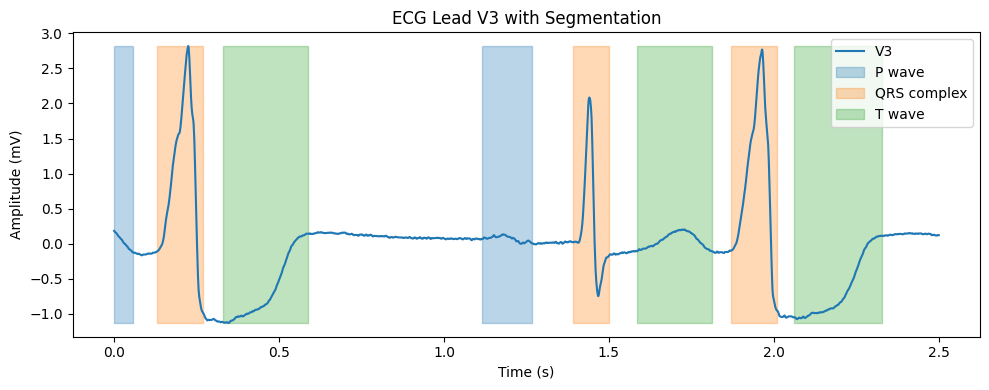

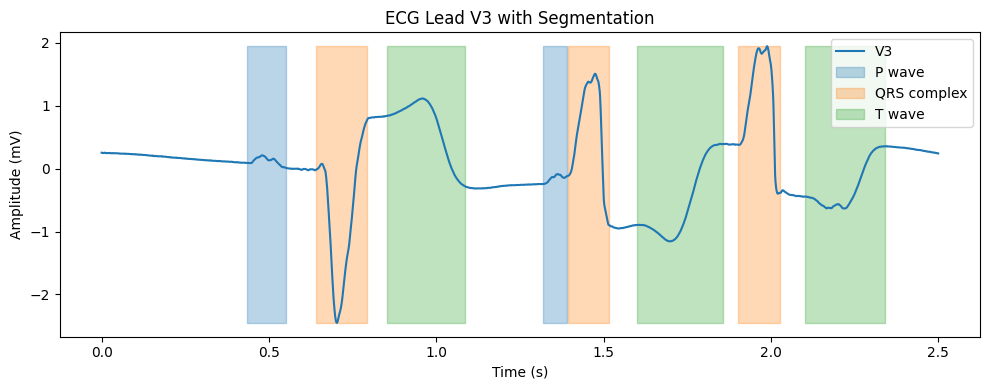

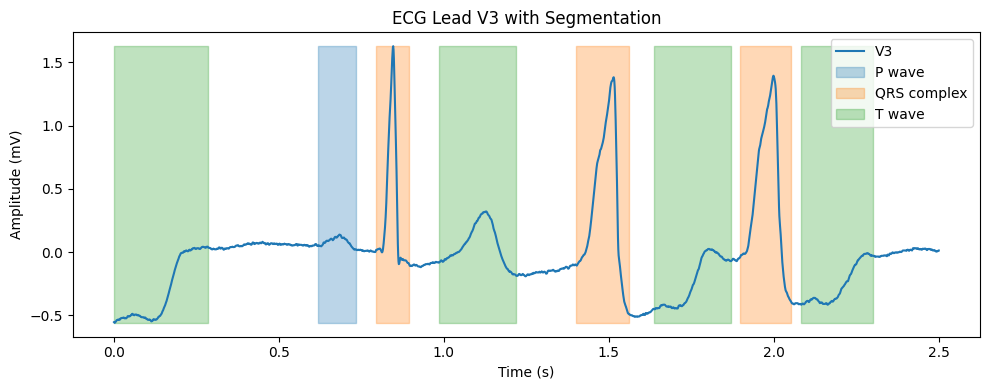

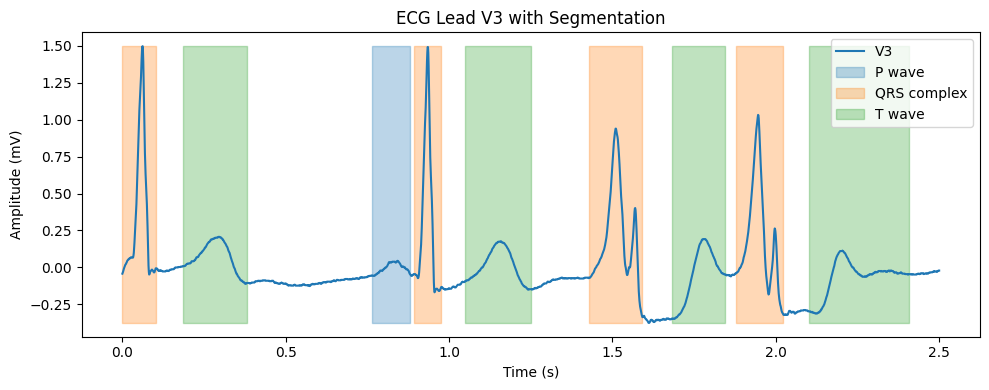

In [68]:
# Time vector for 2.5 seconds
x = np.linspace(0, 2.5, int(fs * 2.5))

for i in range(10):
    # Extract V3 lead
    v3_signal = ecg_signals_v3[i]  # Index 8 = V3

    fs = 1000
    fs_high,fs_low = 0.5,100.0
    ecg_250 = sak.signal.interpolate.interp1d(v3_signal,round((v3_signal).T.shape[0]*250/fs), axis=0).T
    ecg_250 = sp.signal.filtfilt(*sp.signal.butter(2, fs_high/250., 'high'), ecg_250, axis=-1)
    ecg_250 = sp.signal.filtfilt(*sp.signal.butter(2,  fs_low/250.,  'low'), ecg_250, axis=-1)

    segmentation_250 = predict_ecg(ecg_250,250.,models_ECG,normalize=True,filter=False)

    segmentation = sak.signal.interpolate.interp1d(segmentation_250,(v3_signal).T.shape[0],axis=-1,kind="nearest")

    # Plot
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(x, v3_signal, label='V3')

    # Overlay segmentations (P, QRS, T)
    ax.fill_between(x, np.min(v3_signal), np.max(v3_signal), where=(segmentation[0, :] == 1), color='C0', alpha=0.3, label='P wave')
    ax.fill_between(x, np.min(v3_signal), np.max(v3_signal), where=(segmentation[1, :] == 1), color='C1', alpha=0.3, label='QRS complex')
    ax.fill_between(x, np.min(v3_signal), np.max(v3_signal), where=(segmentation[2, :] == 1), color='C2', alpha=0.3, label='T wave')

    # Labels and legend
    ax.set_title("ECG Lead V3 with Segmentation")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    plt.tight_layout()
    plt.show()

In [64]:
import numpy as np
from scipy.signal import find_peaks

# Step 1: Get the QRS segmentation mask
qrs_mask = segmentation[1, :]

# Step 2: Find where QRS is detected (rising edges)
qrs_diff = np.diff(qrs_mask.astype(int), prepend=0)
qrs_starts = np.where(qrs_diff == 1)[0]  # Rising edges = starts of QRS

# Step 3: Check number of QRS detected
if len(qrs_starts) < 4:
    raise ValueError("Less than 4 QRS complexes detected in the signal.")

# Step 4: Take the last QRS onset (4th cycle)
last_qrs_index = qrs_starts[-1]

# Step 5: Define a window around the last QRS (e.g., ±50 ms at 1000 Hz)
window_size = 50
start = max(0, last_qrs_index - window_size)
end = min(len(v3_signal), last_qrs_index + window_size)

# Step 6: Find the R peak as the max in this window
r_peak_value = np.max(v3_signal[start:end])
r_peak_index = np.argmax(v3_signal[start:end]) + start

print(f"Last R-peak at index {r_peak_index}, value: {r_peak_value}")

Last R-peak at index 1945, value: 1.032


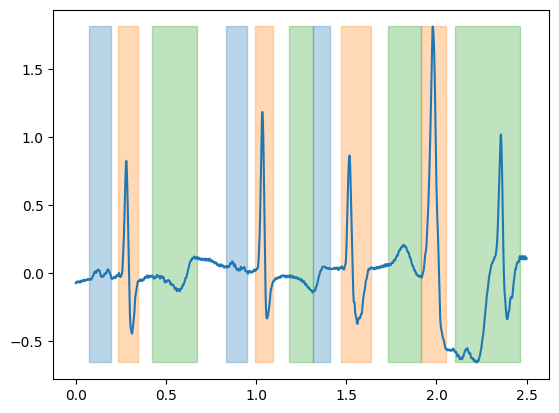

In [65]:
#Plot a single signal
plt.plot(x, sig)
plt.fill_between(x, np.min(sig), np.max(sig), where=(segmentation[0,:] == 1), color='C0', alpha = 0.3 );
plt.fill_between(x, np.min(sig), np.max(sig), where=(segmentation[1,:] == 1), color='C1', alpha = 0.3 );
plt.fill_between(x, np.min(sig), np.max(sig), where=(segmentation[2,:] == 1), color='C2', alpha = 0.3 );


In [66]:
#Load the full dataset, useful if you have few cases.
#BE CAREFUL WHEN SPLITTING THE CASES SO YOU DON'T HAVE THE SAME PATIENT IN BOTH TRAIN AND TEST
data = pickle.load(open('full_data_corrected_2024.pkl', 'rb'))

In [67]:
#Structure of the dictionary to reach the ECG signals
data['P186']['Structures']['1-AO']['P3'].keys()

KeyError: 'P186'

In [ ]:
#This way, the simplified version of the specific SOO is in the key-route: patient - Simplified_SOO
template     = pd.read_excel('labels_FontiersUnsupervised.xlsx', sheet_name='Hoja2')
for patient in data.keys():
    idx_patient = int(patient[1:]) - 1
    data[patient]['Simplified_SOO'] =  template.iloc[idx_patient]['Simplified']